<a href="https://colab.research.google.com/github/its51/Travel-Insurance-Prediction---Hackathon/blob/master/Final_Travel_Insurance_Claim_Team_Kernel_Matters_edit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Problem Description
-Insurance companies take risks over customers. Risk management is a very important aspect of the insurance industry. Insurers consider every quantifiable factor to develop profiles of high and low insurance risks.

-Insurers collect vast amounts of information about policyholders and analyze the data.

-As a Data scientist in an insurance company, you need to analyze the available data and predict whether to sanction the insurance or not.

# Dataset Description
A zipped file containing train, test and sample submission files are given. The training dataset consists of data corresponding to 52310 customers and the test dataset consists of 22421 customers. Following are the features of the dataset

-Target: Claim Status (Claim)
-Name of agency (Agency)
-Type of travel insurance agencies (Agency.Type)
-Distribution channel of travel insurance agencies (Distribution.Channel)
-Name of the travel insurance products (Product.Name)
-Duration of travel (Duration)
-Destination of travel (Destination)
-Amount of sales of travel insurance policies (Net.Sales)
-The commission received for travel insurance agency (Commission)
-Age of insured (Age)
-The identification record of every observation (ID)

#Evaluation Metric
-The evaluation metric for this task will be precision_score.

## Def Func


In [ ]:
#********************************************************************************************************************************************************************
#Info Describe DataFrame
#********************************************************************************************************************************************************************
def info_desc(df):
  a = df.info()                              
  print('\n'*2)

  b = pd.DataFrame(df.describe())
  print(' {:^80} '.format('Describe DataFrame'),'\n')

  return  b
#********************************************************************************************************************************************************************
#Shape DataFrame 
#********************************************************************************************************************************************************************
def shape(df):

  print('Total no. of Columns :', df.shape[1]),print('Total no. of Rows    :', df.shape[0])
#********************************************************************************************************************************************************************  
## Checking Null value_counts with %
#********************************************************************************************************************************************************************
def get_nulls(df):

  Null_Counts = df.isnull().sum().sort_values(ascending = False)
  Null_Percentage = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
 
  Null_Counts_Percentage = pd.concat([ Null_Counts, Null_Percentage], axis=1, keys=['Null_Counts', 'Null_Percentage'])
  return Null_Counts_Percentage
#********************************************************************************************************************************************************************
#unique values and its count of entire dataframe
#********************************************************************************************************************************************************************
def unique(df):
  for i in df :
   print('\n')
   print('*'*10,i,'*'*10)
   print('\n')
   print(df[i].nunique())
   print(df[i].unique())
#********************************************************************************************************************************************************************
#unique values and its count of a particular column in a  dataframe
#********************************************************************************************************************************************************************
def unique_in_col(df,col):
   print('* >',df[col].nunique(),'< *','n_uniques')
   print('\n')
   print(df[col].unique())
#********************************************************************************************************************************************************************
## visualizing null values with missingno library
#********************************************************************************************************************************************************************
!pip install missingno
import missingno as msno
#********************************************************************************************************************************************************************
def msno_matrix(df):
  msno.matrix(df,labels=True)
  ; 
def msno_bar(df):
  msno.bar(df,labels=True)
  ;
def msno_heatmap(df):
  msno.heatmap(df)  
#********************************************************************************************************************************************************************
### dropping columns with more than 40% null values
#********************************************************************************************************************************************************************
# selecting cols with more than 40 % null values
#********************************************************************************************************************************************************************
def null_40(df):
  cols_to_drop = df[df.Null_Percentage > 40]
  print(cols_to_drop.shape[0],'columns > 40 % null values \n')
  drop_cols = list(cols_to_drop.index.values)
  return drop_cols
#********************************************************************************************************************************************************************
# selecting cols with more than 50 % null values
#********************************************************************************************************************************************************************
def null_50(df):
  cols_to_drop = df[df.Null_Percentage > 50]
  print(cols_to_drop.shape[0],'columns > 50 % null values \n')
  drop_cols = list(cols_to_drop.index.values)
  return drop_cols
#********************************************************************************************************************************************************************
# selecting cols with more than 60 % null values
#********************************************************************************************************************************************************************
def null_60(df):
  cols_to_drop = df[df.Null_Percentage > 60]
  print(cols_to_drop.shape[0],'columns > 60 % null values \n')
  drop_cols = list(cols_to_drop.index.values)
  return drop_cols
#********************************************************************************************************************************************************************
## dropping columns > 40 % null values 
#********************************************************************************************************************************************************************
#cols = [#column name list]
def col_drop(df,cols):
  df.drop(columns=cols,inplace = True)
#********************************************************************************************************************************************************************
### mask values from one columns to other column if null        
#********************************************************************************************************************************************************************
def mask(to_col,from_col):
  to.mask(pd.isnull,from_col)
#********************************************************************************************************************************************************************
#Sort Dictionary Using a Lambda Function
#********************************************************************************************************************************************************************
def sort_dict(dict1):
        sorted_tuples = sorted(dict1.items(), key=lambda item: item[1]) # item[0]> sorts with keys item[1]>sorts with values 
       #print(sorted_tuples)  # [(1, 1), (3, 4), (2, 9)]
        sorted_dict = {k: v for k, v in sorted_tuples}
        print(sorted_dict)
#********************************************************************************************************************************************************************
#lower case all dict keys
#********************************************************************************************************************************************************************
def lower_dict_keys(dict_name):
  dict_name = dict((k.lower(), v) for k, v in dict_name .items()) 
  return dict_name
#dict_name = lower_dict_keys(dict_name)
#********************************************************************************************************************************************************************




##Import All Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import scipy.stats as ss


!pip install plotly==4.14.3
import plotly
import plotly.express as px
import plotly.graph_objects as go 
from plotly.offline import iplot

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """


     |████████████████████████████████| 13.2MB 333kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


## Read Train Test Data

In [ ]:
train     = '/content/drive/My Drive/1.Grey Atom/Its 51/DataFiles/0002hackathon/train.csv'
test      = '/content/drive/My Drive/1.Grey Atom/Its 51/DataFiles/0002hackathon/test.csv'

data      = pd.read_csv(train)
test_data = pd.read_csv(test)

## Check for Null Values and Describe dataframe

In [ ]:
shape(data)

Total no. of Columns : 11
Total no. of Rows    : 52310


In [ ]:
info_desc(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    52310 non-null  int64  
 1   Agency                52310 non-null  object 
 2   Agency Type           52310 non-null  object 
 3   Distribution Channel  52310 non-null  object 
 4   Product Name          52310 non-null  object 
 5   Duration              52310 non-null  int64  
 6   Destination           52310 non-null  object 
 7   Net Sales             52310 non-null  float64
 8   Commision (in value)  52310 non-null  float64
 9   Age                   52310 non-null  int64  
 10  Claim                 52310 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 4.4+ MB



                                Describe DataFrame                                 



,ID,Duration,Net Sales,Commision (in value),Age,Claim
count,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000
mean,6005.745804,58.256108,48.554673,12.219963,39.555725,0.166699
std,2306.450475,109.138708,60.198589,22.847645,13.762473,0.372710
min,2000.000000,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,4015.000000,10.000000,19.800000,0.000000,33.000000,0.000000
50%,6002.000000,24.000000,29.500000,0.000000,36.000000,0.000000
75%,8004.000000,57.000000,55.000000,13.380000,43.000000,0.000000
max,10000.000000,4881.000000,682.000000,262.760000,118.000000,1.000000


- There are no null values in feature columns

In [ ]:
dur0 = data[data['Duration'] < 0]   #Filter rows with values less than 0 in Duration column
age1 = data[data['Age'] < 1]        #Filter rows with values less than 1 in Age columns  

print('* {} : Entries has Duration < 0'.format(len(dur0)))
print('* {} : Entries has Age < 1'.format(len(age1)))

* 4 : Entries has Duration < 0
* 2 : Entries has Age < 1


In [ ]:
# Drop rows where duration is less than 0
data.drop(dur0.index,inplace=True)
# Drop rows where Age is less than 1
data.drop(age1.index, inplace = True)
# Drop column 'ID' 
col_drop(data,"ID") # or use --> # data.drop('ID',axis = 1, inplace = True)
#run the prev cell and verify this cleaning step 

## EDA

In [ ]:
shape(data), print(data.sample(2).T);

Total no. of Columns : 10
Total no. of Rows    : 52304
                                         40044                     46638
Agency                                     EPX                       EPX
Agency Type                      Travel Agency             Travel Agency
Distribution Channel                    Online                    Online
Product Name          2 way Comprehensive Plan  2 way Comprehensive Plan
Duration                                   159                         7
Destination                          INDONESIA                 SINGAPORE
Net Sales                                   20                        20
Commision (in value)                         0                         0
Age                                         42                        36
Claim                                        0                         0


###***Histograms*** Plot.ly

In [ ]:

hist1 = px.histogram(data,
             x='Agency Type',
             color='Claim',
             title='Distribution of Agency Type w.r.t. Claims',
             barmode='group')# barmode =   overlay ,group,stack

hist2 = px.histogram(data,
             x='Product Name',
             color='Claim',
             title='Distribution Products/Plans w.r.t. Claims',
             barmode='group')# barmode =   overlay ,group,stack


###***Sunburst*** Plot.ly

In [ ]:
px.sunburst(data,
            path = ['Agency Type','Distribution Channel','Agency','Product Name', 'Destination'],
            values = 'Claim',
            title = 'Agency Type > Distribution Channel > Agency > Product Name > Destination >> Claims',
            )

In [ ]:
px.sunburst(data,
            path = ['Agency Type','Agency','Product Name'],
            values = 'Claim')

Final 

In [ ]:
# Unique Agency Type
agency_type = data['Agency Type'].unique()
agency = sorted([agency for agency in agency_type])


print('======================')
print('* {} Types of Agency *'.format(len(agency)))
print('======================\n')

for agency in agency:
  print('*',agency)
print('\n')

# Distribution of Agency Type against Claim status
hist1.show()

####################################################################################################################################
total_products     = data['Product Name'].unique()
len_total_products = len(total_products)
print('===================================================')
print("* {} Products / Plans Offered by both Agency Type *".format(len_total_products))
print('===================================================\n')

total_plans        = sorted([plan for plan in total_products])    
for plan in total_plans:
  print("*",plan)
print('\n')   
##############################################################################
# Products offered by Airlines and Travel Agency
travel_products    = data[data['Agency Type'] == 'Travel Agency']['Product Name'].unique()
airlines_products  = data[data['Agency Type'] == 'Airlines']['Product Name'].unique()
##############################################################################
print('==================================================')
print('* {} Products / Plans Offered by Airlines Agency *'.format(len(airlines_products)))
print('==================================================\n')

airlines_plans = sorted([plan for plan in airlines_products]) 
for plan in airlines_plans:
  print("*",plan)
print('\n')   
###############################################################################
print('================================================')
print('* {} Products / Plans Offered by Travel Agency *'.format(len(travel_products)))
print('================================================\n')

travel_plans       = sorted([plan for plan in travel_products])
for plan in travel_plans:
  print("*",plan)
print('\n')   
###############################################################################
# Common Products/Plans in Airlines and Travel agency
print('=======================================================')
print('* Common Products / Plans in Airlines & Travel Agency *')
print('=======================================================\n')
common_plan = sorted([plan for plan in airlines_products if plan in travel_products])
for plan in common_plan:
  print("*",plan)
print('\n'*2)    
 ############################################################################### 
total_agency     = data['Agency'].unique()

print('=====================================================')
print("* Airlines & Travel Agency comprises of {} Agencies *".format(len(total_agency)))
print('=====================================================\n')

all_agency        = sorted([agency for agency in total_agency])    
for agency in all_agency:
  print("*",agency)
print('\n')   
##############################################################################
# Unique Agency of Airlines & Travel Agency
airlines_agency = data[data['Agency Type']=='Airlines']['Agency'].unique()
travel_agency = data[data['Agency Type']=='Travel Agency']['Agency'].unique()

##############################################################################
print('====================================')
print('* Airlines comprise of {} Agencies *'.format(len(airlines_agency)))
print('====================================\n')

all_airlines_agency = sorted([agency for agency in airlines_agency]) 
for agency in all_airlines_agency:
  print("*",agency)
print('\n')   
##############################################################################
print('=========================================')
print('* Travel Agency comprise of {} Agencies *'.format(len(travel_agency)))
print('=========================================\n')

all_travel_agency    = sorted([agency for agency in travel_agency])
for agency in all_travel_agency:
  print("*",agency)
print('\n')   
##############################################################################



* 2 Types of Agency *

* Airlines
* Travel Agency




* 25 Products / Plans Offered by both Agency Type *

* 1 way Comprehensive Plan
* 2 way Comprehensive Plan
* 24 Protect
* Annual Gold Plan
* Annual Silver Plan
* Annual Travel Protect Gold
* Annual Travel Protect Platinum
* Annual Travel Protect Silver
* Basic Plan
* Bronze Plan
* Cancellation Plan
* Child Comprehensive Plan
* Comprehensive Plan
* Gold Plan
* Individual Comprehensive Plan
* Premier Plan
* Rental Vehicle Excess Insurance
* Silver Plan
* Single Trip Travel Protect Gold
* Single Trip Travel Protect Platinum
* Single Trip Travel Protect Silver
* Spouse or Parents Comprehensive Plan
* Ticket Protector
* Travel Cruise Protect
* Value Plan


* 10 Products / Plans Offered by Airlines Agency *

* 24 Protect
* Annual Gold Plan
* Annual Silver Plan
* Basic Plan
* Bronze Plan
* Gold Plan
* Premier Plan
* Silver Plan
* Ticket Protector
* Value Plan


* 17 Products / Plans Offered by Travel Agency *

* 1 way Comprehensive Plan
* 2 way Comprehensive Plan
* Annual Travel Protect Gold


In [ ]:
product_counts = pd.DataFrame(data['Product Name'].value_counts().reset_index())
product_counts.columns = ['Product Name','Count']
product_counts

In [ ]:
# creating trace1 
trace1 = go.Bar(
                x = product_counts['Product Name'],
                y = product_counts['Count'],
                marker = dict(color = 'rgba(108,0,0, 0.6)',
                              line=dict(color='rgb(0,0,0)',width=1.5)
                              )
                )
                
layout = go.Layout(hoverlabel=dict( bgcolor=None,font_size=18,font_family="Rockwell"),
        title = '<b>* Distribution of Products/Plans *<b>',
        xaxis = dict(title = '<b>Product/Plans<b>'),
        yaxis = dict(title = 'Count'))

fig1 = go.Figure(data = trace1,layout = layout)
iplot(fig1)
#plotly.offline.plot(fig1,filename=" Top 10 Car brands in North_Zone.html")

In [ ]:
pie1 = px.pie(product_counts,
       names = "Product Name",
       values='Count',
       )
pie1.update_layout(
    hoverlabel=dict(
      # bgcolor="white",
        font_size=18,
        font_family="Rockwell"))

pie1.update_traces(textposition='inside', textinfo='percent+label',textfont_size=18)
pie1.show()

In [ ]:
labels = product_counts['Product Name'][:]
label_1= labels[:10] #top 10 plans on bar chart
values = product_counts['Count']

# Make Plotly Subplots 
figs = make_subplots(
    rows=1, cols=2,
    #column_widths=[0.5,0.5],
    #row_heights=[2],
    specs=[[ {"type": "pie"},{"type": "bar"}]],
    subplot_titles = ['<b> % </b>','<b>Top 10 Plans</b>'],
   # column_titles  = ['',''],
   # row_titles     = ['row1','row2']
   # x_title        = [1,1]
   # y_title='yy'

)
# make_subplots(rows=1, cols=1, shared_xaxes=False, shared_yaxes=False, start_cell='top-left',
# print_grid=False, horizontal_spacing=None, vertical_spacing=None, subplot_titles=None, column_widths=None, row_heights=None, specs=None, insets=None, 
#column_titles=None, row_titles=None, x_title=None, y_title=None, figure=None, **kwargs)

pie2 = go.Pie(
    labels = labels, 
    values = values,
    text   = ['Count']*25,
    
    legendgroup  = "group",
    textinfo     = 'percent+label',      
    textposition = 'inside',
    hoverlabel   = dict(bgcolor=None,
                        font_size=18,
                        font_family="Rockwell"),
)

bar2 = go.Bar(
    x    = label_1,
    y    = values,
    text = ['Count']*25,

    legendgroup  = "group", 
    hoverlabel   = dict(bgcolor= 'White',
                        font_size=18,
                        font_family="Rockwell"),
    marker       = dict(color  = 'rgba(108,0,0, 0.5)',
                        line   = dict(color='rgb(0,0,0)',
                                        width=1)
                              )
)
figs.update_layout(title = '<b>* Products/Plans Distribution *<b>')
figs.add_trace(pie2,row=1, col=1)

figs.add_trace(bar2,row=1, col=2)

figs.show()


In [ ]:

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
#Distribution of various plans of diff agency wrt claims
histfunc      = 'count'       #  ["count","sum","avg","min","max"]
barmode       = 'stack'      #  ['stack','group','overlay' ]
categoryorder = 'total descending'       #  ['trace', 'category ascending', 'category descending',
                           #  'array', 'total ascending', 'total descending',
                          #  'min ascending', 'min descending', 'max ascending', 
                         #  'max descending', 'sum ascending', 'sum descending', 
                        #  'mean ascending', 'mean descending', 'median ascending', 
                       #  'median descending']
title = ' a' 
x     = 'Agency'   
color = 'Product Name'
facet_row = 'Claim'     
facet_col = 'Agency Type'         
fig = px.histogram(data,
             title=title,
             barmode=barmode,
             x = x ,
             histfunc=histfunc,
             color=color,
             facet_row = facet_row,
             facet_col = facet_col
            )
fig.update_layout(
    hoverlabel=dict(
      # bgcolor="white",
        font_size=16,
        font_family="Rockwell"),
    autosize=False,
    width=2000,
    height=800,
    yaxis=dict(
        title_text="Product Count",
       # ticktext=["Very long label", "long label", "3", "label"],
       # tickvals=[1, 2, 3, 4],
      #  tickmode="array",
        titlefont=dict(size=30)),
    xaxis=dict(
        title_text="Agency",
        #ticktext=["Very long label", "long label", "3", "label"],
       # tickvals=[1, 2, 3, 4],
       # tickmode="array",
        titlefont=dict(size=30)    

    )

)

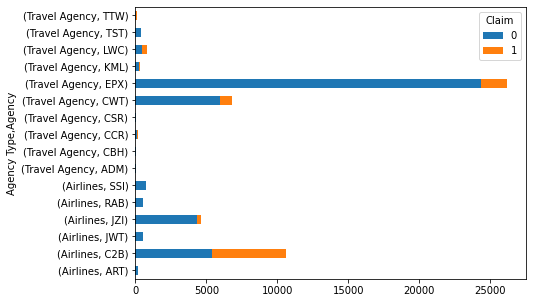

Each Agencies consists of different plans


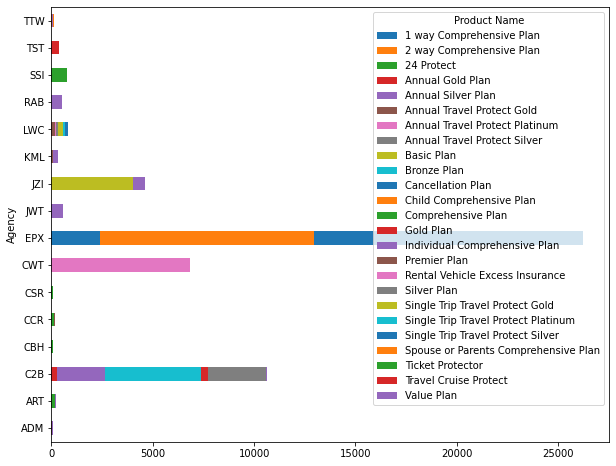

In [ ]:
data.groupby(['Agency Type', 'Agency'])['Claim'].value_counts().unstack().plot(kind = 'barh', stacked = True, figsize =(7,5))
plt.show()

print('Each Agencies consists of different plans')
data.groupby('Agency')['Product Name'].value_counts().unstack().plot(kind = 'barh', stacked = True, figsize =(10,8))
plt.show()

In [ ]:
data.groupby(['Agency Type','Agency','Product Name'])['Claim'].value_counts()

Agency Type    Agency  Product Name                          Claim
Airlines       ART     24 Protect                            0         165
                       Value Plan                            0          58
               C2B     Annual Gold Plan                      1         172
                                                             0         123
                       Annual Silver Plan                    1        1451
                                                                      ... 
Travel Agency  TTW     Child Comprehensive Plan              0           8
                       Individual Comprehensive Plan         0          47
                                                             1          37
                       Spouse or Parents Comprehensive Plan  0          11
                                                             1           1
Name: Claim, Length: 66, dtype: int64

In [ ]:
data['cClaim'] = data.Claim.astype('category')

In [ ]:
fig = px.sunburst(data,
            path=['Agency Type','Agency','Product Name','cClaim'],          
         
            )
fig.update_layout(showlegend=True,
    hoverlabel=dict(
        bgcolor="black",
        font_size=16,
        font_family="Rockwell",
    bordercolor='white'
        
    )
)
#fig.update_traces(hoverinfo='label+text', selector=dict(type='sunburst'))
fig.update_traces(insidetextfont_size=18, selector=dict(type='sunburst'))

Agencies under Airlines ::

['JZI' 'C2B' 'RAB' 'JWT' 'SSI' 'ART'] 


Agencies under Travel.A ::

['EPX' 'CWT' 'TST' 'CSR' 'LWC' 'CCR' 'KML' 'ADM' 'CBH' 'TTW'] 


Claim approval and rejection rate of all agencies


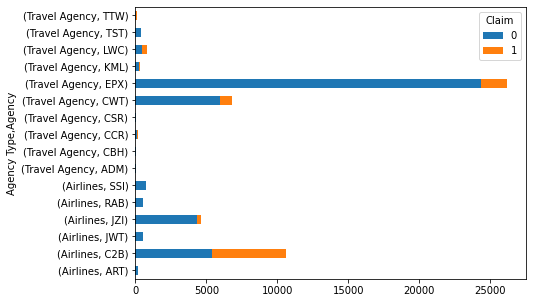

Each Agencies consists of different plans


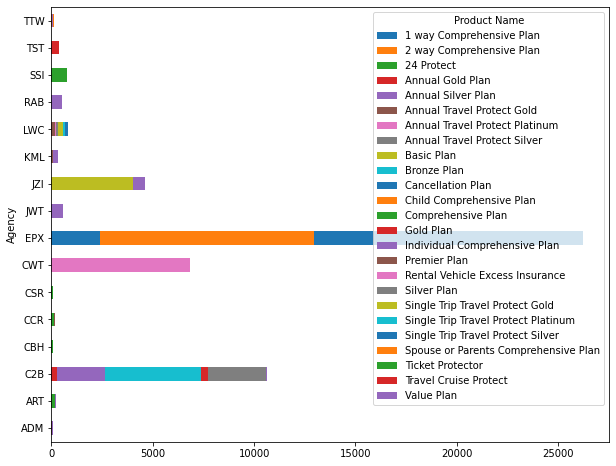

In [ ]:
print('==================================================')
print('Claim approval and rejection rate of all agencies')
print('==================================================')
data.groupby(['Agency Type', 'Agency'])['Claim'].value_counts().unstack().plot(kind = 'barh', stacked = True, figsize =(7,5))
plt.show()

print('Each Agencies consists of different plans')
data.groupby('Agency')['Product Name'].value_counts().unstack().plot(kind = 'barh', stacked = True, figsize =(10,8))
plt.show()

## dsf


Agency Types : ['Travel Agency' 'Airlines']


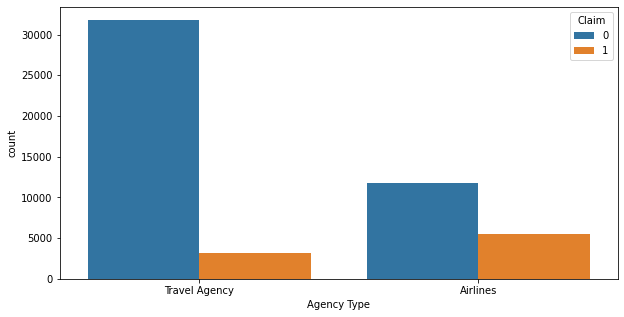

Number of products offered

Number of products offered by Airlines  :: 10
Number of products offered by Agency    :: 17 


Products which are common ::

Value Plan
Premier Plan
Insurance products offered by Airlines ::

['Basic Plan' 'Bronze Plan' 'Silver Plan' 'Value Plan'
 'Annual Silver Plan' 'Annual Gold Plan' 'Ticket Protector' '24 Protect'
 'Gold Plan' 'Premier Plan'] 




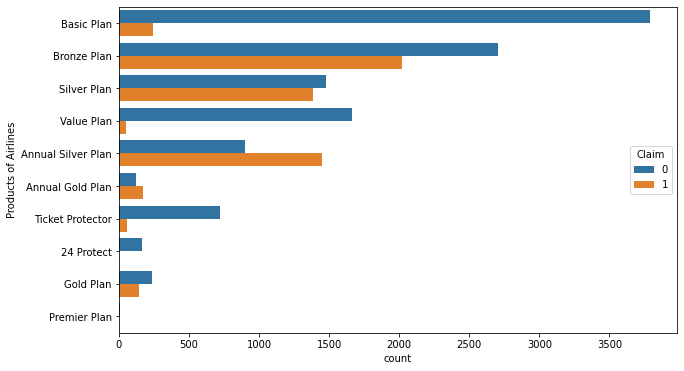

Insurance products offered by Travel Agency ::

['Cancellation Plan' 'Rental Vehicle Excess Insurance'
 '2 way Comprehensive Plan' '1 way Comprehensive Plan'
 'Travel Cruise Protect' 'Comprehensive Plan'
 'Single Trip Travel Protect Gold' 'Single Trip Travel Protect Silver'
 'Value Plan' 'Annual Travel Protect Gold'
 'Annual Travel Protect Platinum' 'Single Trip Travel Protect Platinum'
 'Annual Travel Protect Silver' 'Premier Plan'
 'Individual Comprehensive Plan' 'Spouse or Parents Comprehensive Plan'
 'Child Comprehensive Plan'] 




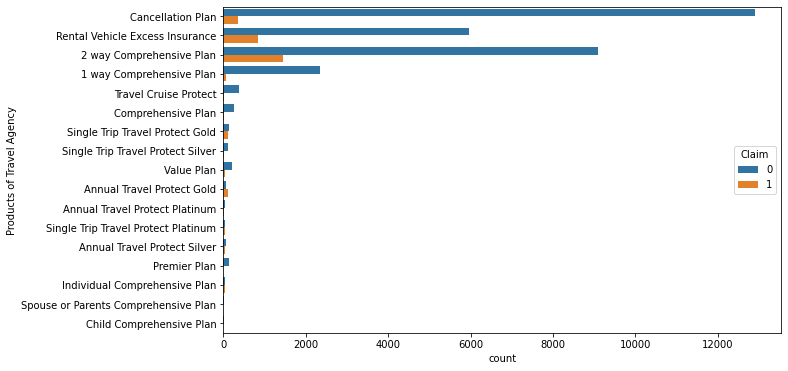

Agencies under Airlines ::

['JZI' 'C2B' 'RAB' 'JWT' 'SSI' 'ART'] 


Agencies under Travel.A ::

['EPX' 'CWT' 'TST' 'CSR' 'LWC' 'CCR' 'KML' 'ADM' 'CBH' 'TTW'] 


Claim approval and rejection rate of all agencies


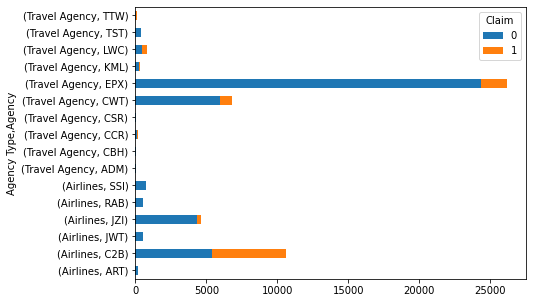

Each Agencies consists of different plans


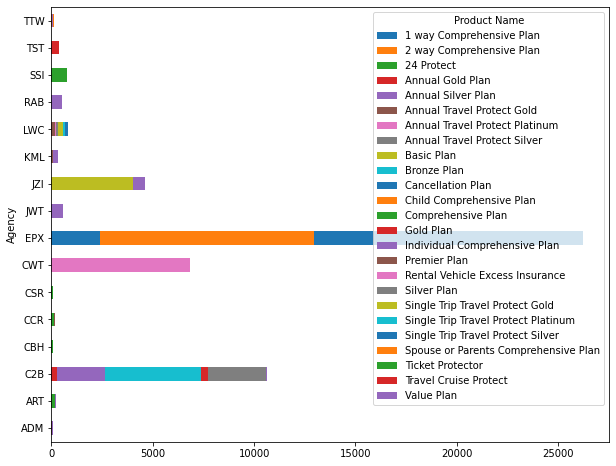

In [ ]:
# Unique Agency Type
agency_type = data['Agency Type'].unique()
print('Agency Types :', agency_type)
# Distribution of Agency Type against Claim status
plt.figure (figsize = (10,5))
sns.countplot(x = 'Agency Type', hue = 'Claim', data = data)
plt.show()

# Products offered by both Airlines and Travel Agency
# These are the number of insurance products/policies offered by Airlines and Travel Agency
airline_products = data[data['Agency Type'] == 'Airlines']['Product Name'].unique()
agency_products = data[data['Agency Type'] == 'Travel Agency']['Product Name'].unique()
len_airline_products = len(airline_products)
len_agency_products = len(agency_products)
print('============================')
print('Number of products offered')
print('============================\n')
print('Number of products offered by Airlines  ::', len_airline_products)
print('Number of products offered by Agency    ::', len_agency_products, '\n\n')

# These are the number of products which are common in both airlines and agency
print('==============================')
print('Products which are common ::')
print('==============================\n')
for i in airline_products:
    if i in agency_products:
        print(i)

df_airline_products = data[data['Agency Type'] == 'Airlines'][['Product Name', 'Claim']]
print('=============================================')
print('Insurance products offered by Airlines ::')
print('=============================================\n')
print(airline_products, '\n\n')
#plt.subplots(1,2)
plt.figure(figsize = (10,6))
sns.countplot(y = 'Product Name', hue = 'Claim', data = pd.DataFrame(df_airline_products))
plt.ylabel('Products of Airlines')
plt.show()


df_agency_products = data[data['Agency Type'] == 'Travel Agency'][['Product Name', 'Claim']]
print('=============================================')
print('Insurance products offered by Travel Agency ::')
print('=============================================\n')
print(agency_products, '\n\n')
#plt.subplots(1,2)
plt.figure(figsize = (10,6))
sns.countplot(y = 'Product Name', hue = 'Claim', data = pd.DataFrame(df_agency_products))
plt.ylabel('Products of Travel Agency')
plt.show()

airline_agency_unique = data[data['Agency Type'] == 'Airlines']['Agency'].unique()
travel_agency_unique = data[data['Agency Type'] == 'Travel Agency']['Agency'].unique()
print('==========================')
print('Agencies under Airlines ::')
print('==========================\n')
print(airline_agency_unique, '\n\n')
print('==========================')
print('Agencies under Travel.A ::')
print('==========================\n')
print(travel_agency_unique, '\n\n')

print('==================================================')
print('Claim approval and rejection rate of all agencies')
print('==================================================')
data.groupby(['Agency Type', 'Agency'])['Claim'].value_counts().unstack().plot(kind = 'barh', stacked = True, figsize =(7,5))
plt.show()

print('Each Agencies consists of different plans')
data.groupby('Agency')['Product Name'].value_counts().unstack().plot(kind = 'barh', stacked = True, figsize =(10,8))
plt.show()

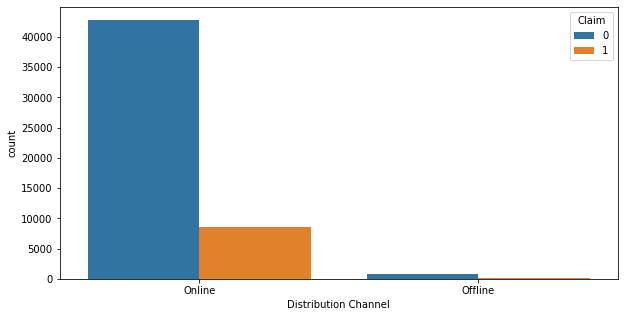

In [ ]:
plt.figure (figsize = (10,5))
sns.countplot(x = 'Distribution Channel', hue = 'Claim', data = data)
plt.show()

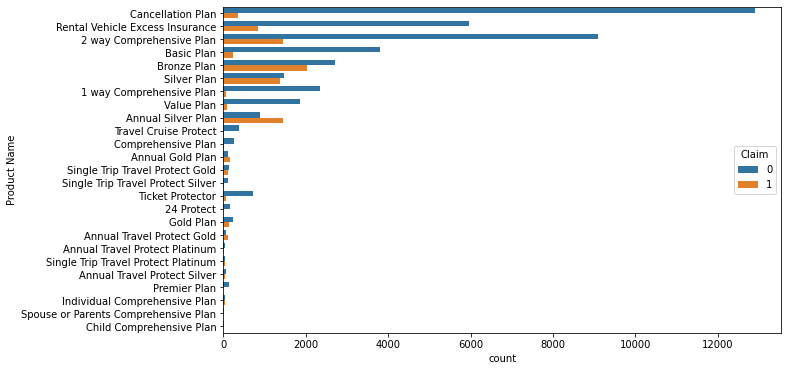

In [ ]:
plt.figure (figsize = (10,6))
sns.countplot(y = 'Product Name', hue = 'Claim', data = data)
plt.show()

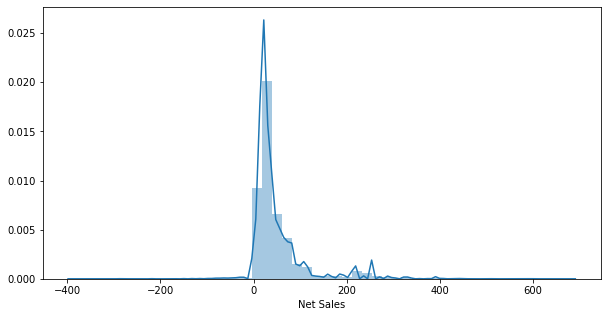

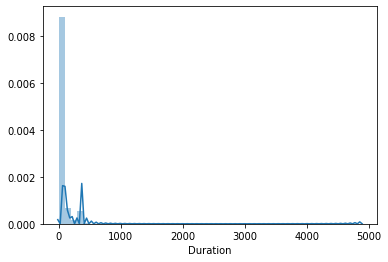

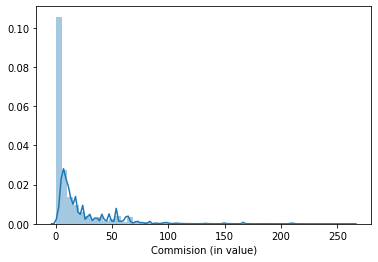

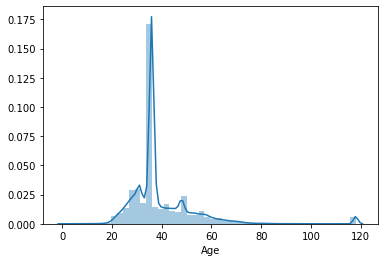

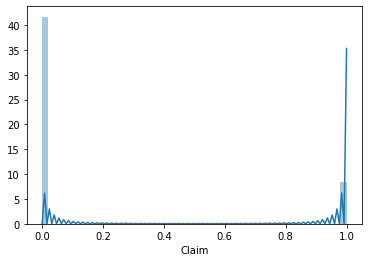

In [ ]:
# spread of numerical features

num_df =data.select_dtypes(include=np.number)
plt.figure (figsize = (10,5))
for i, col in enumerate(num_df.columns):
    plt.figure(i)
    sns.distplot(num_df[col])

####Agency wise volume of product (Which agecy selling more plans)

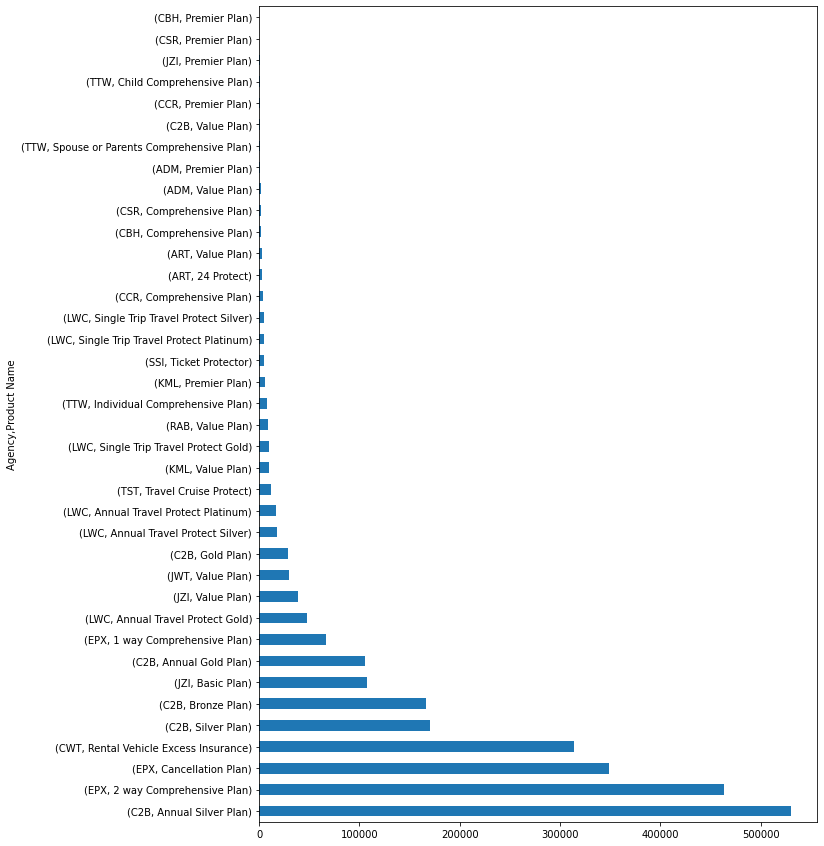

In [ ]:
df = data.groupby(by=['Agency', 'Product Name'])['Net Sales'].sum()

df = df.sort_values(ascending= False)
df
df.plot(kind = 'barh', stacked = True, figsize =(10,15))
plt.show()


In [ ]:
agen_prod_netsales = px.sunburst(data,
            path=['Agency','Product Name'],
            values='Net Sales')
#plotly.offline.plot(full, filename='full.html')
agen_prod_netsales

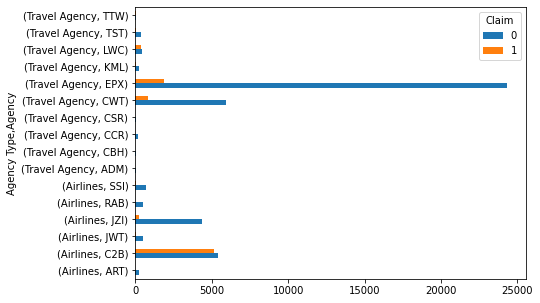

In [ ]:


data.groupby(['Agency Type', 'Agency'])['Claim'].value_counts().unstack().plot(kind = 'barh', stacked = False, figsize =(7,5))
plt.show()

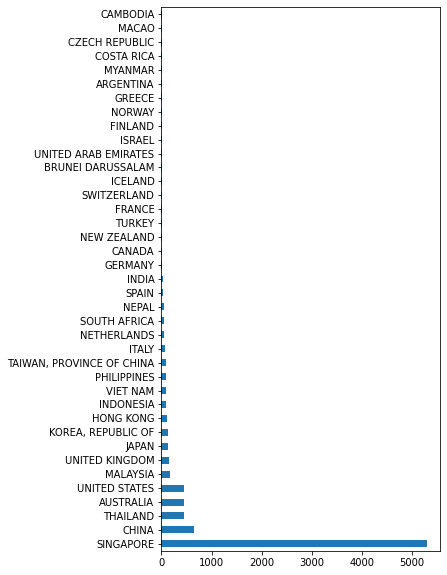

In [ ]:
## Country wise claim policies
claim1 = data[data['Claim']==1]
claim1

claim1['Destination'].value_counts().plot(kind='barh', figsize=(5,10))
plt.show()

In [ ]:
### Claim percentage w.r.t Net sale for all products offered by agencies

claim_0_df = data[data['Claim']==0]
claim_1_df = data[data['Claim']==1]
table=pd.crosstab(data['Product Name'],data['Claim'],margins=True)
table['Net Sales_0']=claim_0_df.groupby('Product Name')['Net Sales'].sum()
table['Net Sales_1']=claim_1_df.groupby('Product Name')['Net Sales'].sum()

table['Net Sales_1'] = table['Net Sales_1'].fillna(0)

table['per_claim_0'] = round((table['Net Sales_0']*100)/(table['Net Sales_0'] + table ['Net Sales_1']),2)

table['per_claim_1'] = round((table['Net Sales_1']*100)/(table['Net Sales_0'] + table ['Net Sales_1']),2)

table['Product Name1'] = table.index
table.drop(table.tail(1).index, inplace = True)
table

Claim,0,1,All,Net Sales_0,Net Sales_1,per_claim_0,per_claim_1,Product Name1
Product Name,,,,,,,,
1 way Comprehensive Plan,2341,68,2409,63943.00,2310.347009,96.51,3.49,1 way Comprehensive Plan
2 way Comprehensive Plan,9098,1457,10555,384459.00,78609.162004,83.02,16.98,2 way Comprehensive Plan
24 Protect,165,0,165,3389.16,0.000000,100.00,0.00,24 Protect
Annual Gold Plan,123,172,295,41001.90,64209.874342,38.97,61.03,Annual Gold Plan
Annual Silver Plan,897,1451,2348,194023.68,335681.934727,36.63,63.37,Annual Silver Plan
Annual Travel Protect Gold,63,120,183,15583.65,31760.616627,32.92,67.08,Annual Travel Protect Gold
Annual Travel Protect Platinum,36,14,50,12067.20,4476.257956,72.94,27.06,Annual Travel Protect Platinum
Annual Travel Protect Silver,61,31,92,11776.80,6378.812821,64.87,35.13,Annual Travel Protect Silver
Basic Plan,3792,246,4038,100016.00,7199.844272,93.28,6.72,Basic Plan


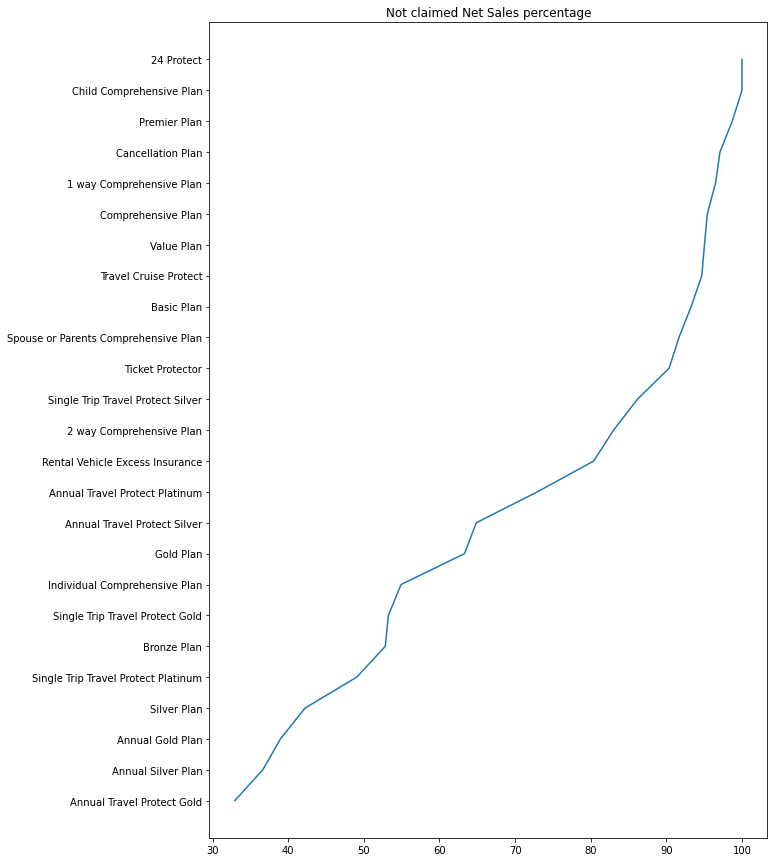

In [ ]:
table.sort_values(by = 'per_claim_1' , ascending = False , inplace = True)
plt.figure(figsize = (10,15))

plt.plot(table['per_claim_0'],table['Product Name1'])
plt.title("Not claimed Net Sales percentage")

plt.show()

#### Distribution of target variable 'Claim' in dataset

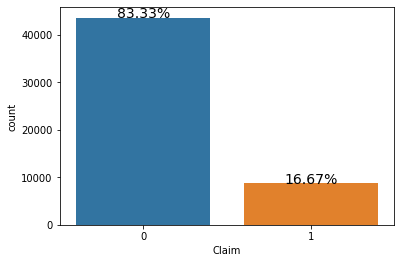

In [ ]:
s = sns.countplot(x = 'Claim',data = data)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(data)*100),
            ha="center", fontsize=14)

- we can clearly see its imbalanced class but, we have tried using SMOTE but we were not getting score as better than without any oversampling technique. It may be because of origanl dataset nature related to target variable

## Pipeline

In [ ]:
corr_matrix=data.corr()
df = corr_matrix["Claim"].sort_values(ascending=False)
df


Claim                   1.000000
Net Sales               0.326780
Commision (in value)    0.258682
Duration                0.201575
Age                    -0.060167
Name: Claim, dtype: float64

- from above correlation matrix with target variable we can see Age and Duration column have lowest value so drop this two columns
- tried creating bins/bucketize for Age column which didn't helped to improve score so drop Age column 

In [ ]:

data.drop('Duration', axis = 1, inplace = True)
data.drop('Age', axis = 1, inplace = True)

#### correlation between categorical columns using Cramer's coefficient Matrix

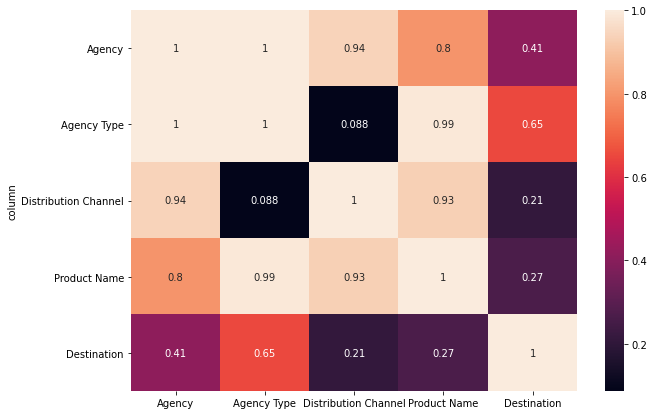

In [ ]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

categorical=['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',  'Destination']
cramers=pd.DataFrame({i:[cramers_v(data[i],data[j]) for j in categorical] for i in categorical})
cramers['column']=[i for i in categorical if i not in ['memberid']]
cramers.set_index('column',inplace=True)

#categorical correlation heatmap

plt.figure(figsize=(10,7))
sns.heatmap(cramers,annot=True)
plt.show()

- Agency type is highly co-related with Agency and Product Name hence we can drop Agency Type column
- Distribution Channel is highly coorelated with Product Name and Agency, hence we can drop Distribution channel column as well
- Product Name is highly coorelated with PAgency, Distribution Channel and Agency Type, hence we can drop Product Name column as well
-Agency seems to be more important than Destination as per previous EDA, hence drop Destination column as well


In [ ]:
data.drop(columns = ['Agency Type', 'Distribution Channel','Product Name', 'Destination'], axis =1 , inplace = True)
data

,Agency,Net Sales,Commision (in value),Claim
0,EPX,12.000000,0.0000,0
1,EPX,17.000000,0.0000,0
2,CWT,19.800000,11.8800,0
3,EPX,27.000000,0.0000,0
4,EPX,37.000000,0.0000,0
...,...,...,...,...
52305,C2B,444.750593,111.1858,1
52306,RAB,23.000000,9.2000,0
52307,C2B,61.100000,15.2800,0
52308,EPX,10.000000,0.0000,0


### low net sales can't have high commission value so by doing data imputation, replaced those values in commission value column with 0

In [ ]:
data.loc[data['Net Sales'] == 0.0, 'Commision (in value)'] = 0
data.loc[(data['Net Sales'] < 0) & 
         (data['Commision (in value)'] > 0), 
         'Commision (in value)'] = 0 
data

,Agency,Net Sales,Commision (in value),Claim
0,EPX,12.000000,0.0000,0
1,EPX,17.000000,0.0000,0
2,CWT,19.800000,11.8800,0
3,EPX,27.000000,0.0000,0
4,EPX,37.000000,0.0000,0
...,...,...,...,...
52305,C2B,444.750593,111.1858,1
52306,RAB,23.000000,9.2000,0
52307,C2B,61.100000,15.2800,0
52308,EPX,10.000000,0.0000,0


#### Encode Categorical columns using label encoder

In [ ]:
cat_df =data.select_dtypes(exclude=np.number)
encoded_cat =  cat_df.apply(LabelEncoder().fit_transform)
encoded_cat

,Agency
0,7
1,7
2,6
3,7
4,7
...,...
52305,2
52306,12
52307,2
52308,7


#### Categorize numerical features

In [ ]:
num_df =data.select_dtypes(include=np.number)
num_df
final_label_data = pd.concat([encoded_cat, num_df], axis = 1)
final_label_data

,Agency,Net Sales,Commision (in value),Claim
0,7,12.000000,0.0000,0
1,7,17.000000,0.0000,0
2,6,19.800000,11.8800,0
3,7,27.000000,0.0000,0
4,7,37.000000,0.0000,0
...,...,...,...,...
52305,2,444.750593,111.1858,1
52306,12,23.000000,9.2000,0
52307,2,61.100000,15.2800,0
52308,7,10.000000,0.0000,0


## Train model using train test split and other regression models

In [ ]:
X = final_label_data.drop(columns=['Claim'])
y = final_label_data['Claim']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
log_model = LogisticRegression()
log_model = log_model.fit(X_train, y_train)
ypred_train = log_model.predict(X_test)
print("precision score" ,precision_score(y_test, ypred_train))
print("accuracy score" ,log_model.score(X_test,y_test))

precision score 0.607909604519774
accuracy score 0.8418302319653327


- Here we are getting less precision score, may be it can be used as base estimator

In [ ]:
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
rfc = RandomForestClassifier(n_estimators=111, random_state=5)
abc = AdaBoostClassifier(n_estimators=111, random_state=5)
bc = BaggingClassifier(n_estimators=111, random_state=5)
etc = ExtraTreesClassifier(n_estimators=111, random_state=5)

In [ ]:
classifiers = {'DTC':dtc, 'RFC':rfc, 'ABC':abc, 'BC':bc, 'ETC':etc}

def train_classifier(classifiers, X_train, y_train):
    classifiers.fit(X_train, y_train)
def pred_labels(classifiers, features):
    return classifiers.predict(features)



In [ ]:
# For precision score
    
precsn_scores = []
for key,value in classifiers.items():
    train_classifier(value, X_train, y_train)
    y_pred = pred_labels(value, X_test)
    precsn_scores.append((key, [precision_score(y_test, y_pred)]))

In [ ]:
from sklearn.metrics import accuracy_score
scores = []
for key,value in classifiers.items():
    train_classifier(value, X_train, y_train)
    y_pred = pred_labels(value, X_test)
    scores.append((key, [accuracy_score(y_test, y_pred)]))

In [ ]:
precsn_scores

[('DTC', [0.8679762448606669]),
 ('RFC', [0.8716528162511542]),
 ('ABC', [0.5968039336201598]),
 ('BC', [0.8709232889297198]),
 ('ETC', [0.8745980707395499])]

In [ ]:
scores

[('DTC', [0.9323222023961254]),
 ('RFC', [0.9322584756563854]),
 ('ABC', [0.849732347693092]),
 ('BC', [0.9325771093550854]),
 ('ETC', [0.9335967371909253])]

In [ ]:
etc = ExtraTreesClassifier( criterion = 'gini',max_features="auto",min_samples_split=2,n_estimators=111,n_jobs=-1, random_state=5)
etc.fit(X_train,y_train)
ypred_etc = etc.predict(X_test)
precision_score(y_test, ypred_etc)

0.8745980707395499

In [ ]:
abc = AdaBoostClassifier(base_estimator=etc, n_estimators=100, random_state=5, learning_rate=1.4)
abc.fit(X_train,y_train)
ypred_abc = abc.predict(X_test)
precision_score(y_test, ypred_abc)

0.8743809095002252

- Tried to use Ada Boost classifier to improve score but Extra Tree Classifier has better score without Ada Boost Classifier

## Working on Test data given

### Read test data, did preprocessing for feature selection as same as train data

In [ ]:
test_data = pd.read_csv('test.csv')
test_data.drop('ID',axis = 1, inplace = True)
test_data.drop('Age', axis = 1, inplace = True)
test_data.drop('Duration', axis = 1, inplace = True)
test_data.drop(columns = ['Agency Type', 'Distribution Channel','Product Name', 'Destination'], axis =1 , inplace = True)
test_data

,Agency,Net Sales,Commision (in value)
0,EPX,18.0,0.00
1,EPX,20.0,0.00
2,C2B,13.5,3.38
3,EPX,41.0,0.00
4,C2B,30.0,7.50
...,...,...,...
22416,CWT,0.0,11.88
22417,EPX,33.0,0.00
22418,EPX,20.0,0.00
22419,EPX,10.0,0.00


In [ ]:
# label encoding for categorical column
cat_df =test_data.select_dtypes(exclude=np.number)
le = LabelEncoder()
encoded_cat =  cat_df.apply(LabelEncoder().fit_transform)
encoded_cat

,Agency
0,7
1,7
2,2
3,7
4,2
...,...
22416,6
22417,7
22418,7
22419,7


In [ ]:
# categorize numerical column
num_df =test_data.select_dtypes(include=np.number)

# Concatenate encoded categorical column with numerical dataframe
final_test_data = pd.concat([encoded_cat, num_df], axis = 1)
final_test_data

,Agency,Net Sales,Commision (in value)
0,7,18.0,0.00
1,7,20.0,0.00
2,2,13.5,3.38
3,7,41.0,0.00
4,2,30.0,7.50
...,...,...,...
22416,6,0.0,11.88
22417,7,33.0,0.00
22418,7,20.0,0.00
22419,7,10.0,0.00


In [ ]:
final_test_data.loc[final_test_data['Net Sales'] == 0.0, 'Commision (in value)'] = 0
final_test_data.loc[(final_test_data['Net Sales'] < 0) & 
         (final_test_data['Commision (in value)'] > 0), 
         'Commision (in value)'] = 0 

In [ ]:
etc.fit(X_train,y_train)
ytest_pred = etc.predict(final_test_data)

In [ ]:
final_test_data['Claim']=  ytest_pred
final_test_data

,Agency,Net Sales,Commision (in value),Claim
0,7,18.0,0.00,0
1,7,20.0,0.00,0
2,2,13.5,3.38,0
3,7,41.0,0.00,0
4,2,30.0,7.50,0
...,...,...,...,...
22416,6,0.0,0.00,0
22417,7,33.0,0.00,0
22418,7,20.0,0.00,0
22419,7,10.0,0.00,0


In [ ]:
test_data = pd.read_csv('test.csv')
final_testdata = pd.concat([test_data, final_test_data['Claim']], axis = 1)
final_testdata

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,17631,EPX,Travel Agency,Online,Cancellation Plan,192,HONG KONG,18.0,0.00,36,0
1,15064,EPX,Travel Agency,Online,1 way Comprehensive Plan,2,SINGAPORE,20.0,0.00,36,0
2,14139,C2B,Airlines,Online,Bronze Plan,13,SINGAPORE,13.5,3.38,24,0
3,19754,EPX,Travel Agency,Online,2 way Comprehensive Plan,133,"TAIWAN, PROVINCE OF CHINA",41.0,0.00,36,0
4,16439,C2B,Airlines,Online,Silver Plan,2,SINGAPORE,30.0,7.50,32,0
...,...,...,...,...,...,...,...,...,...,...,...
22416,13227,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,10,AUSTRALIA,0.0,11.88,27,0
22417,12767,EPX,Travel Agency,Online,2 way Comprehensive Plan,32,THAILAND,33.0,0.00,36,0
22418,13638,EPX,Travel Agency,Online,2 way Comprehensive Plan,5,THAILAND,20.0,0.00,36,0
22419,14859,EPX,Travel Agency,Online,Cancellation Plan,15,HONG KONG,10.0,0.00,36,0


In [ ]:
# Final Submission
final_Submission = final_testdata[['ID' , 'Claim']]
final_Submission= final_Submission.set_index('ID')
final_Submission.to_csv('test data with predicted value of Claim ETC.csv')
print("done")

done


In [ ]:
final_Submission['Claim'].unique()

array([0, 1])